In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import datetime
import calendar
import seaborn as sns

In [115]:
# load in data
ex = pd.read_csv('fitbod_workout.csv')

# rename columns
ex.columns = ['date','excercise','sets','reps','weight_lb','is_warmup','note']

date_sep  = ex['date'].str.split('-', n=2 ,expand=True)
date_sep.columns = [['year','month','day']]

ex = pd.concat([ex,date_sep],axis=1)
ex.columns = ['date','excercise','sets','reps','weight_lb','is_warmup','note','year','month','day']
ex = ex[['date','year','month','day','excercise','sets','reps','weight_lb','is_warmup','note']]
ex['year'] = pd.to_numeric(ex['year'])
ex['month'] = pd.to_numeric(ex['month'])
ex['day'] = pd.to_numeric(ex['day'])

# convert date column to datetime
ex['date'] = pd.to_datetime(ex['date'])

# create day of week column
ex['day_of_week'] = ex['date'].dt.day_name()

# create weekday column
Weekday = []
for i in range(0,len(ex)):
     Weekday.append(date(ex['year'][i],ex['month'][i],ex['day'][i]).isoweekday())
ex['weekday'] = Weekday

# reorder columns
ex = ex[['date','year','month','day','day_of_week','weekday','excercise','sets','reps','weight_lb','is_warmup','note']]

# create total volume column for each excercise each day
ex['total_volume_lb'] = ex.sets * ex.reps * ex.weight_lb

# sort by date, ascending
ex = ex.sort_values(by=['date'])

print(ex.head())

#ex.weekday.value_counts()

           date  year  month  day day_of_week  weekday             excercise  \
3540 2018-05-02  2018      5    2   Wednesday        3  Exercise Ball Crunch   
3516 2018-05-02  2018      5    2   Wednesday        3     Mountain Climbers   
3517 2018-05-02  2018      5    2   Wednesday        3     Mountain Climbers   
3518 2018-05-02  2018      5    2   Wednesday        3     Mountain Climbers   
3519 2018-05-02  2018      5    2   Wednesday        3             Tuck Jump   

      sets  reps  weight_lb  is_warmup  note  total_volume_lb  
3540     1    15          0        NaN   NaN                0  
3516     1    22          0        NaN   NaN                0  
3517     1    22          0        NaN   NaN                0  
3518     1    22          0        NaN   NaN                0  
3519     1    15          0        NaN   NaN                0  


In [116]:
#create groups
volume_by_date = ex.groupby('date')['total_volume_lb'].sum()
sets_by_date = ex.groupby('date')['sets'].sum()
reps_by_date = ex.groupby('date')['reps'].sum()

#create ex2 to assign day of week
ex2 = pd.DataFrame(ex.date.unique(),columns=['date'])
ex2['day_of_week'] = ex2['date'].dt.day_name()

ex2['date'] = ex2['date'].astype('str')
date_sep2  = ex2['date'].str.split('-', n=2 ,expand=True)
date_sep2.columns = [['year','month','day']]

#concat back together
ex2 = pd.concat([ex2,date_sep2],axis=1)
ex2.columns = ['date','day_of_week','year','month','day']
#create separate features for month/day/year
ex2['year'] = pd.to_numeric(ex2['year'])
ex2['month'] = pd.to_numeric(ex2['month'])
ex2['day'] = pd.to_numeric(ex2['day'])

#generate weekday
Weekday = []
for i in range(0,len(ex2)):
     Weekday.append(date(ex2['year'][i],ex2['month'][i],ex2['day'][i]).isoweekday())
ex2['weekday'] = Weekday

#put volume, sets, reps into ex2
ex2['volume_lb'] = np.array(volume_by_date)
ex2['sets'] = np.array(sets_by_date)
ex2['reps'] = np.array(reps_by_date)

#drop zeroes
ex2 = ex2[ex2['volume_lb'] !=0]

# reorder colunms for logic
ex2 = ex2[['date','day_of_week','year','month','day','weekday','sets','reps','volume_lb']]

print(ex2.head())

         date day_of_week  year  month  day  weekday  sets  reps  volume_lb
0  2018-05-02   Wednesday  2018      5    2        3    25   355       3460
1  2018-05-03    Thursday  2018      5    3        4    27   333       4900
2  2018-05-07      Monday  2018      5    7        1    16   172       4170
3  2018-05-09   Wednesday  2018      5    9        3    28   303       6340
4  2018-05-10    Thursday  2018      5   10        4    32   316       5540


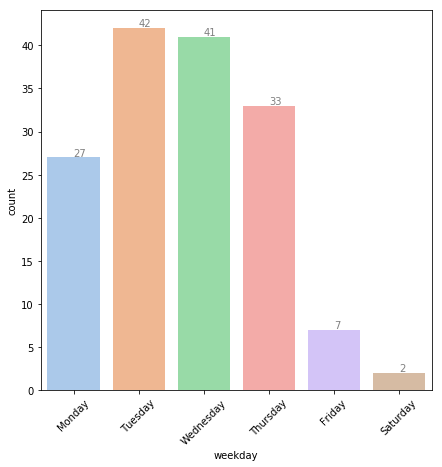

In [117]:
names = ['Monday', 'Tuesday','Wednesday', 'Thursday',  'Friday', 'Saturday','Sunday']
p = sns.color_palette("pastel")

#plot the number of excercises on each day of the week
plt.figure(figsize=[7,7])
ax = sns.countplot(ex2['weekday'], palette="pastel")
ax.set_xticklabels(labels=names,rotation=45)
s = ex2['weekday'].value_counts().sort_index()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.weekday + 0.2 , v.weekday, color='gray')

plt.show()

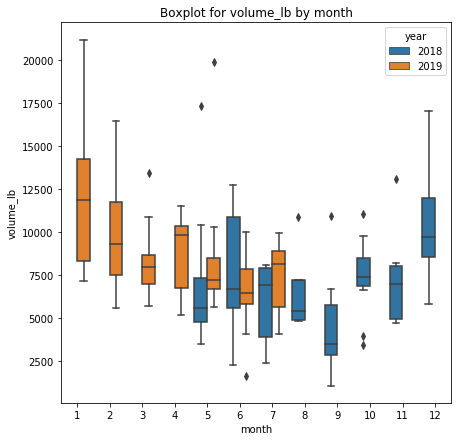

In [118]:
plt.figure(figsize=(7,7))
sns.boxplot(x='month',y='volume_lb',hue='year',data=ex2)
plt.title('Boxplot for volume_lb by month')
plt.show()

In [119]:
#find average volumes by day of week
ex2.groupby('day_of_week')['volume_lb'].mean()

day_of_week
Friday       8703.000000
Monday       8440.148148
Saturday     9825.000000
Thursday     7455.848485
Tuesday      7468.238095
Wednesday    8474.682927
Name: volume_lb, dtype: float64

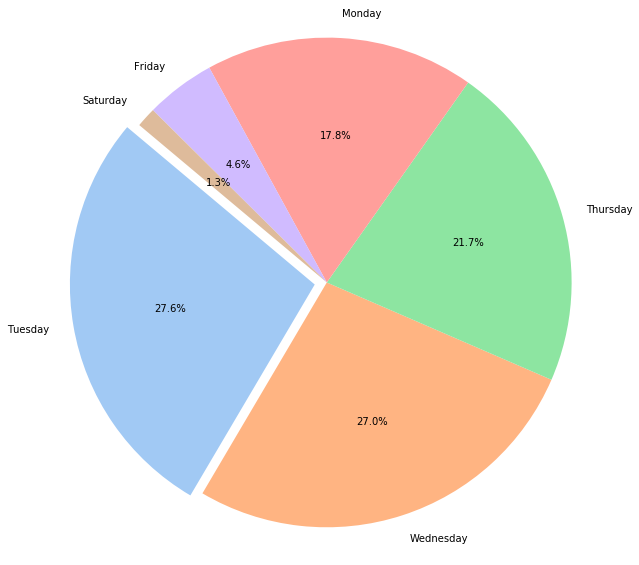

In [120]:
#plot pie chart of days of week count percent

plt.figure(figsize=[10,10])
labels = ex2['day_of_week'].value_counts().index.tolist()
sizes = ex2['weekday'].value_counts()
colors = sns.color_palette("pastel")
explode = (0.05, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [121]:
#display total volume by year,month
ex2.groupby(['year','month'])['volume_lb'].sum()

year  month
2018  5         76212
      6         85745
      7         47600
      8         26485
      9         36190
      10       104735
      11        50645
      12       114485
2019  1        112078
      2        108759
      3         99314
      4         70201
      5        109255
      6         78489
      7         95433
Name: volume_lb, dtype: int64

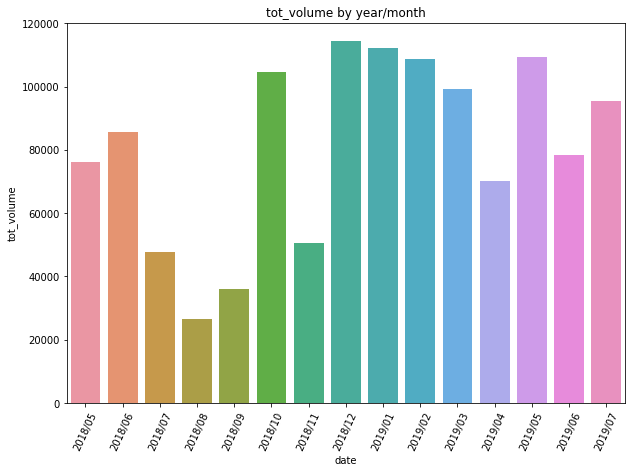

In [122]:
ex3 = pd.DataFrame()
ex3['tot_volume'] =  ex2.groupby(['year','month'])['volume_lb'].sum().values

#extract index information for plotting
ex3['year'] = np.where(ex2.groupby(['year','month'])['volume_lb'].sum().index.labels[0]==0,
              ex2.groupby(['year','month'])['volume_lb'].sum().index.levels[0][0],
              ex2.groupby(['year','month'])['volume_lb'].sum().index.levels[0][1])

ex3['month'] = ex2.groupby(['year','month'])['volume_lb'].sum().index.labels[1]+1
ex3['date'] = ex3.apply(lambda x:datetime.datetime.strptime("{0} {1}".format(x['year'],x['month']), "%Y %m"),axis=1)
ex3['date'] = ex3['date'].apply(lambda x: x.strftime("%Y/%m"))
#rearrange columns
ex3 = ex3[['year','month','date','tot_volume']]

#plot tot_volume by year/month
plt.figure(figsize=(10,7))
sns.barplot(x='date',
            y='tot_volume',
            data = ex3)
plt.title('tot_volume by year/month')
plt.xticks(rotation=65)
plt.show()